# Redes de Computadores

## Medindo o desempenho para chegar a diferentes destinos da Internet


Uma vez realizada as medições, o grupo deverá fazer as seguintes análises:

1. Latência para o destino ao longo do tempo (para todas as probes de forma individual e agregada)
2. Quantidade de saltos para o destino ao longo do tempo (para todas as probes de forma individual e agregada)
3. Correlação entre a latência com o número de saltos

**Integrantes do grupo:**
   - Gregory Pitthan
   - Jeferson Lopes
   - Samuel Gomes
   - Nicollas Mirapalheta

# Imports necessários

In [1]:
import matplotlib.pyplot as plt
from random import randint
import seaborn as sns
import pandas as pd
import numpy as np

# Função que retorna o ID de probes que não responderam

In [2]:
def checksum(data):
    """
    Retorna uma lista com o id de probes que em algum momento nao responderam
    
    :param data: dataset (recomendado json do proprio ATLAS Ripe)
    """
    
    errors = []

    for i in range(len(data)):
        if data['result'][i][-1]['hop'] == 255:
            errors.append(data['prb_id'][i])
            
    result = []
    [result.append(x) for x in errors if x not in result]
    return result

# Função que calcula a média das latências

In [3]:
def meanRtt(data):
    """
    Retorna um dicionario com as medias das latencias de cada linha do dataset
    
    :param data: dataset (recomendado json do proprio ATLAS Ripe)
    """
    
    size = len(data)
    rtt = {}
    
    for i in range(0, size):
        try:
            rtt1 = data['result'][i][-1]['result'][0]['rtt']
            rtt2 = data['result'][i][-1]['result'][1]['rtt']
            rtt3 = data['result'][i][-1]['result'][2]['rtt']
            
            mean = float((rtt1 + rtt2 + rtt3) / 3)
            rtt[f'rtt{i}'] = mean
            
        except KeyError as error:
            rtt[f'rtt{i}'] = 0.00
    return rtt

# Função que calcula o número de saltos

In [4]:
def get_hops(data):
    """
    Retorna um dicionario com as medias das latencias de cada linha do dataset
    
    :param data: dataset (recomendado json do proprio ATLAS Ripe)
    """
    
    size = len(data)
    
    hops = {}
    
    for i in range(0, size):
        hops[f'hops{i}'] = int(len(data['result'][i]))
    return hops

# Função que adiciona a coluna da média de latência e nº de saltos ao dataset

In [5]:
def magic(data):
    """
    Chama a funcao do calculo da media e aplica ela em todas as medicoes de cada probe, 
    uma por vez. Faz o mesmo para o numero de saltos.
    Retorna os dados com 2 colunas adicionadas e preenchidas.
    
    :param data: dataset (recomendado json do proprio ATLAS Ripe)
    """
    
    data = data.set_index('timestamp')
    
    data['hops'] = 0.0
    data['rtt_mean'] = 0.0
    probesID = np.unique(data['prb_id'])
    
    for i in range(len(probesID)):
        # 
        medias = list(meanRtt(data[data['prb_id'] == probesID[i]].reset_index()).values())
        data.loc[data['prb_id'] == probesID[i], 'rtt_mean'] = medias
        
        hops = list(get_hops(data[data['prb_id'] == probesID[i]].reset_index()).values())
        data.loc[data['prb_id'] == probesID[i], 'hops'] = hops
    
    return data

# Função para plotar a latência para o destino ao longo do tempo (forma individual)

In [6]:
def plot_uniqueRtt(data, id_probe):
    """
    Retorna o grafico de latencia de uma probe individual
    
    :param data: dataset (recomendado json do proprio ATLAS Ripe)
    :param id_probe: id da probe desejada
    """
    
    data = data[data['prb_id'] == id_probe]['rtt_mean']
    
    plt.figure(figsize=(14, 6))
    plt.title('Média da latência ao longo do tempo')
    plt.ylabel('Latência')
    plt.xlabel('Tempo')
    plt.plot(data, marker='o');

# Função para plotar a  latência para o destino ao longo do tempo (forma agregada)

In [7]:
def plot_aggregatesRtt(data, legend=True):
    """
    Retorna o grafico de latencia de todas as probes para um destino de forma agregada
    
    :param data: dataset (recomendado json do proprio ATLAS Ripe)
    :param legend (opcional): oculta a legenda dos ids no grafico, por padrao vem ativado
    """
    
    plt.figure(figsize=(15, 10))

    plt.title('Média da latência ao longo do tempo')
    plt.ylabel('Latência')
    plt.xlabel('Tempo')
    lines = ['-', '--', ':',]
    
    probesID = np.unique(data['prb_id'])
    
    for n in probesID:
        x = data[data['prb_id'] == n]['rtt_mean']
        plt.plot(x, label = n, linestyle=lines[randint(0, 2)])
    
    if legend == True:
        plt.legend()
        plt.show()
    else:
        plt.show()

# Função para plotar a quantidade de saltos para o destino ao longo do tempo (forma individual)

In [8]:
def plot_uniqueHop(data, id_probe):
    """
    Retorna o grafico de saltos de uma probe individual
    
    :param data: dataset (recomendado json do proprio ATLAS Ripe)
    :param id_probe: id da probe desejada
    """
    
    data = data[data['prb_id'] == id_probe]['hops']
    
    plt.figure(figsize=(14, 6))
    plt.title('Nº de saltos ao longo do tempo')
    plt.ylabel('Saltos')
    plt.xlabel('Tempo')
    plt.plot(data, marker='*', color='#ff7719');

# Função para plotar a quantidade de saltos para o destino ao longo do tempo (forma agregada)

In [9]:
def plot_aggregatesHops(data, legend=True):
    """
    Retorna o grafico de saltos de todas as probes para um destino de forma agregada
    
    :param data: dataset (recomendado json do proprio ATLAS Ripe)
    :param legend (opcional): oculta a legenda dos ids no grafico, por padrao vem ativado
    """
    
    plt.figure(figsize=(15, 10))

    plt.title('Saltos ao longo do tempo')
    plt.ylabel('Saltos')
    plt.xlabel('Tempo')
    lines = ['-', '--', ':',]
    
    probesID = np.unique(data['prb_id'])

    for n in probesID:
        x = data[data['prb_id'] == n]['hops']
        plt.plot(x, label = n, linestyle=lines[randint(0, 2)])

    if legend == True:
        plt.legend()
        plt.show()
    else:
        plt.show()

# Função para plotar a correlação entre a latência e o número de saltos

In [10]:
def plotCorrelation(data):
    """
    Retorna o grafico de dispersao entre a latencia e o numero de saltos entre as probes de um destino
    
    :param data: dataset (recomendado json do proprio ATLAS Ripe)
    """
    
    x = data['hops']
    y = data['rtt_mean']
    
    # print(f'Tamanho da variável x: {len(x)}')
    # print(f'Tamanho da variável y: {len(y)}')
    
    plt.figure(figsize=(10, 8))
    
    ax = sns.scatterplot(data=data, x=x, y=y, 
                    hue='prb_id', legend='full', 
                    palette='deep', s=100)
    
    ax.set_title('Média das latências vs. Nº de saltos')
    ax.set_ylabel("Média das latências")
    ax.set_xlabel('Saltos');

# Função para remover probes do dataset

In [11]:
def cleanData(data, *ids):
    """
    Retorna os dados sem as probes que foram passadas como parametros
    
    :param data: dataset (recomendado json do proprio ATLAS Ripe)
    :param ids: id das probes que se deseja remover dos dados
    """
    probe_ids = []
    [probe_ids.append(x) for x in ids]
        
    try:
        if len(probe_ids) == 1:
            data = data.drop(data[data['prb_id'] == probe_ids[0]].index, axis = 0) # inplace=True
        else:
            for i in range(len(probe_ids)):
                data = data.drop(data[data['prb_id'] == probe_ids[i]].index, axis = 0) # inplace=True
    except (IndexError) as error:
        print(f'{error}! Informe, pelo menos, o ID de uma probe.')
    
    return data

<h1 align='center'> Notion </h1>

In [12]:
notion = pd.read_json('data/notion.json')

## Análise exploratória

In [13]:
notion.head() # 5 primeiros registros

fw   mver  lts     endtime      dst_name      dst_addr        src_addr  \
0  5010  2.2.0   65  1659474356  104.18.33.94  104.18.33.94   187.0.196.133   
1  5070  2.6.1   58  1659474382  104.18.33.94  104.18.33.94   172.31.255.21   
2  4900    NaN    1  1659474320  104.18.33.94  104.18.33.94    192.168.1.74   
3  5070  2.6.1   56  1659474314  104.18.33.94  104.18.33.94    192.168.11.6   
4  5070  2.6.1   37  1659474319  104.18.33.94  104.18.33.94  10.253.254.121   

  proto  af  size  paris_id  \
0  ICMP   4    48         3   
1  ICMP   4    48         3   
2  ICMP   4    48         3   
3  ICMP   4    48         3   
4  ICMP   4    48         3   

                                              result    msm_id   prb_id  \
0  [{'hop': 1, 'result': [{'from': '187.0.196.129...  43150121  1000314   
1  [{'hop': 1, 'result': [{'from': '172.31.255.1'...  43150121    14635   
2  [{'hop': 1, 'result': [{'from': '192.168.1.254...  43150121    19845   
3  [{'hop': 1, 'result': [{'from': '192.168.11.1'...  43150121    52181   
4  [{'hop': 1, 'result': [{'from': '10.253.254.1'...  43150121    54737   

            timestamp    msm_name             from        type  group_id  \
0 2022-08-02 21:05:56  Traceroute    187.0.196.133  traceroute  43150121   
1 2022-08-02 21:05:10  Traceroute    189.6.233.234  traceroute  43150121   
2 2022-08-02 21:05:19  Traceroute  206.116.227.211  traceroute  43150121   
3 2022-08-02 21:05:14  Traceroute    154.5.218.157  traceroute  43150121   
4 2022-08-02 21:05:19  Traceroute   69.172.163.166  traceroute  43150121   

   stored_timestamp  
0        1659510891  
1        1659512304  
2        1659512044  
3        1659513104  
4        1659512712

In [14]:
notion.shape # formato do dataset

(910, 20)

In [15]:
notion = magic(notion)

In [16]:
notion.head()

fw   mver  lts     endtime      dst_name      dst_addr  \
timestamp                                                                       
2022-08-02 21:05:56  5010  2.2.0   65  1659474356  104.18.33.94  104.18.33.94   
2022-08-02 21:05:10  5070  2.6.1   58  1659474382  104.18.33.94  104.18.33.94   
2022-08-02 21:05:19  4900    NaN    1  1659474320  104.18.33.94  104.18.33.94   
2022-08-02 21:05:14  5070  2.6.1   56  1659474314  104.18.33.94  104.18.33.94   
2022-08-02 21:05:19  5070  2.6.1   37  1659474319  104.18.33.94  104.18.33.94   

                           src_addr proto  af  size  ...  \
timestamp                                            ...   
2022-08-02 21:05:56   187.0.196.133  ICMP   4    48  ...   
2022-08-02 21:05:10   172.31.255.21  ICMP   4    48  ...   
2022-08-02 21:05:19    192.168.1.74  ICMP   4    48  ...   
2022-08-02 21:05:14    192.168.11.6  ICMP   4    48  ...   
2022-08-02 21:05:19  10.253.254.121  ICMP   4    48  ...   

                                                                result  \
timestamp                                                                
2022-08-02 21:05:56  [{'hop': 1, 'result': [{'from': '187.0.196.129...   
2022-08-02 21:05:10  [{'hop': 1, 'result': [{'from': '172.31.255.1'...   
2022-08-02 21:05:19  [{'hop': 1, 'result': [{'from': '192.168.1.254...   
2022-08-02 21:05:14  [{'hop': 1, 'result': [{'from': '192.168.11.1'...   
2022-08-02 21:05:19  [{'hop': 1, 'result': [{'from': '10.253.254.1'...   

                       msm_id   prb_id    msm_name             from  \
timestamp                                                             
2022-08-02 21:05:56  43150121  1000314  Traceroute    187.0.196.133   
2022-08-02 21:05:10  43150121    14635  Traceroute    189.6.233.234   
2022-08-02 21:05:19  43150121    19845  Traceroute  206.116.227.211   
2022-08-02 21:05:14  43150121    52181  Traceroute    154.5.218.157   
2022-08-02 21:05:19  43150121    54737  Traceroute   69.172.163.166   

                           type  group_id  stored_timestamp  hops   rtt_mean  
timestamp                                                                     
2022-08-02 21:05:56  traceroute  43150121        1659510891   9.0   2.737333  
2022-08-02 21:05:10  traceroute  43150121        1659512304   9.0   0.000000  
2022-08-02 21:05:19  traceroute  43150121        1659512044   5.0   2.745000  
2022-08-02 21:05:14  traceroute  43150121        1659513104   5.0   1.547333  
2022-08-02 21:05:19  traceroute  43150121        1659512712   7.0  10.370000  

[5 rows x 21 columns]

# Plots

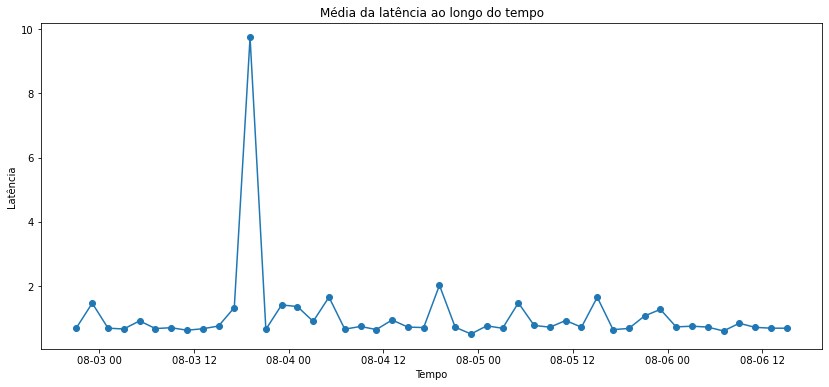

In [17]:
plot_uniqueRtt(notion, 6349)

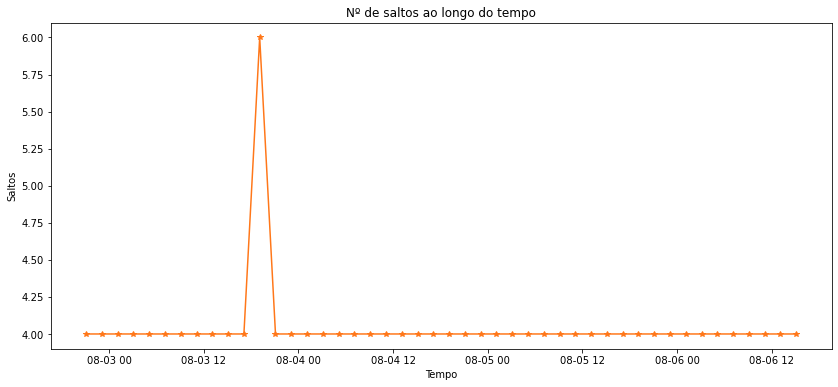

In [18]:
plot_uniqueHop(notion, 6349)

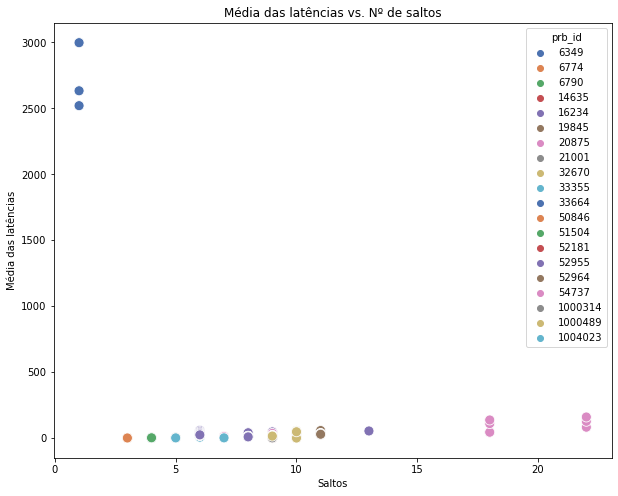

In [19]:
plotCorrelation(notion)

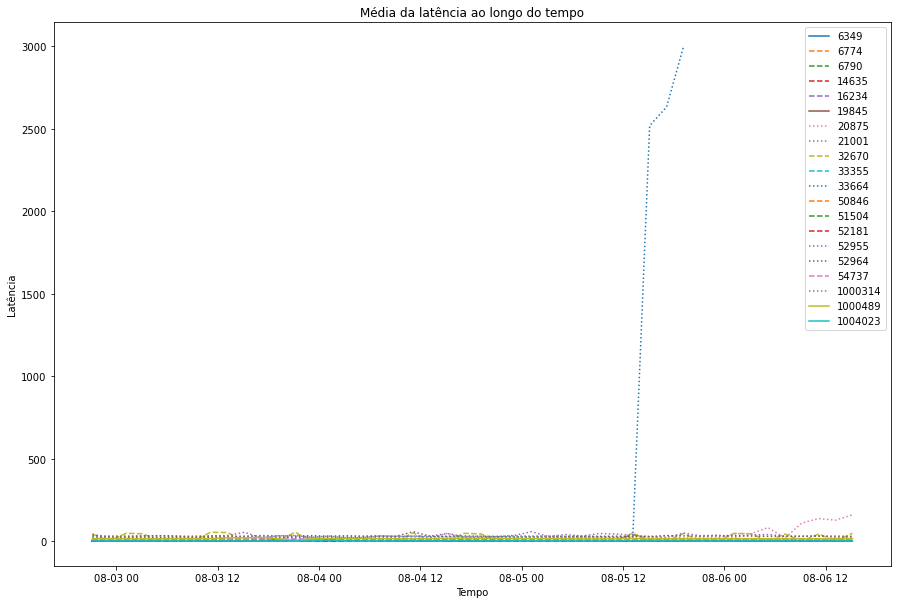

In [20]:
plot_aggregatesRtt(notion)

## Número de saltos ao longo do tempo (agragados)

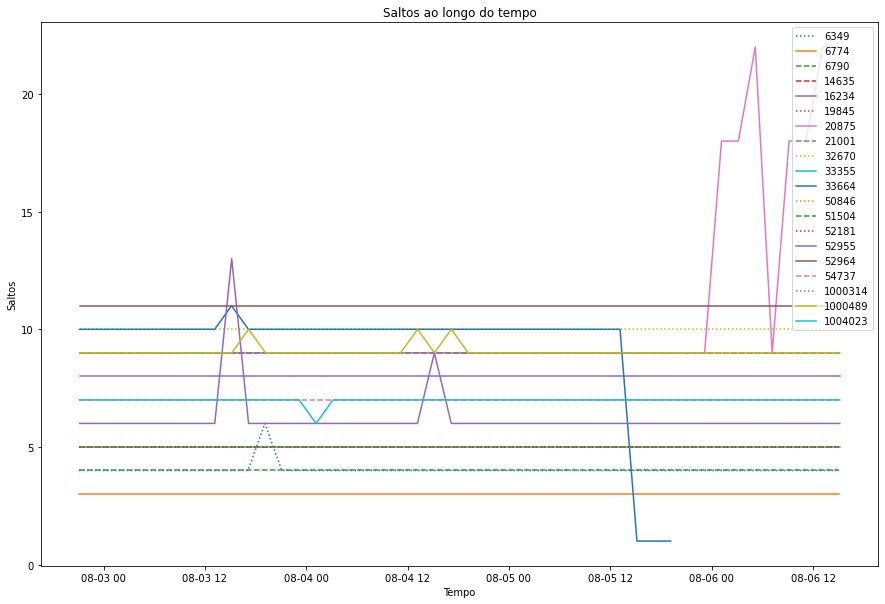

In [21]:
plot_aggregatesHops(notion)

<h1 align='center'> GitHub </h1>

In [22]:
github = pd.read_json('data/github.json')

In [23]:
github = magic(github)

In [24]:
github.head()

fw   mver  lts     endtime      dst_name      dst_addr  \
timestamp                                                                       
2022-08-02 21:04:59  5040  2.4.1   73  1659474350  140.82.121.3  140.82.121.3   
2022-08-02 21:04:14  5070  2.6.1    5  1659474334  140.82.121.3  140.82.121.3   
2022-08-02 21:05:44  5070  2.6.1    8  1659474416  140.82.121.3  140.82.121.3   
2022-08-02 21:05:04  5070  2.6.1   12  1659474328  140.82.121.3  140.82.121.3   
2022-08-02 21:05:49  4900    NaN    7  1659474417  140.82.121.3  140.82.121.3   

                            src_addr proto  af  size  ...  \
timestamp                                             ...   
2022-08-02 21:04:59  181.215.183.179  ICMP   4    48  ...   
2022-08-02 21:04:14       10.0.101.2  ICMP   4    48  ...   
2022-08-02 21:05:44    172.31.255.21  ICMP   4    48  ...   
2022-08-02 21:05:04    192.168.1.103  ICMP   4    48  ...   
2022-08-02 21:05:49     192.168.1.74  ICMP   4    48  ...   

                                                                result  \
timestamp                                                                
2022-08-02 21:04:59  [{'hop': 1, 'result': [{'from': '154.16.57.3',...   
2022-08-02 21:04:14  [{'hop': 1, 'result': [{'from': '10.0.101.1', ...   
2022-08-02 21:05:44  [{'hop': 1, 'result': [{'from': '172.31.255.1'...   
2022-08-02 21:05:04  [{'hop': 1, 'result': [{'from': '192.168.1.1',...   
2022-08-02 21:05:49  [{'hop': 1, 'result': [{'from': '192.168.1.254...   

                       msm_id   prb_id    msm_name             from  \
timestamp                                                             
2022-08-02 21:04:59  43150111  1004023  Traceroute  181.215.183.179   
2022-08-02 21:04:14  43150111    51504  Traceroute    162.156.10.37   
2022-08-02 21:05:44  43150111    14635  Traceroute    189.6.233.234   
2022-08-02 21:05:04  43150111    16234  Traceroute      95.91.245.9   
2022-08-02 21:05:49  43150111    19845  Traceroute  206.116.227.211   

                           type  group_id  stored_timestamp  hops    rtt_mean  
timestamp                                                                      
2022-08-02 21:04:59  traceroute  43150111        1659512437  12.0  210.531000  
2022-08-02 21:04:14  traceroute  43150111        1659512503  18.0  145.447333  
2022-08-02 21:05:44  traceroute  43150111        1659512304   9.0    0.000000  
2022-08-02 21:05:04  traceroute  43150111        1659511433  11.0   21.211000  
2022-08-02 21:05:49  traceroute  43150111        1659512081  18.0  141.916667  

[5 rows x 21 columns]

## Latência ao longo do tempo de forma individual

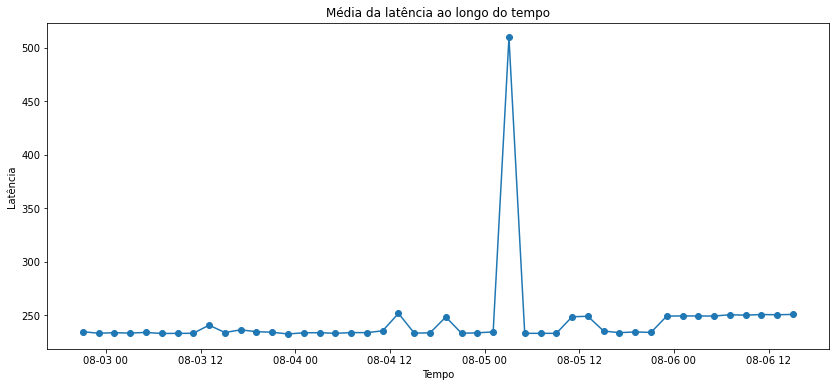

In [25]:
plot_uniqueRtt(github, 6349)

## Nº de saltos ao longo do tempo de forma individual

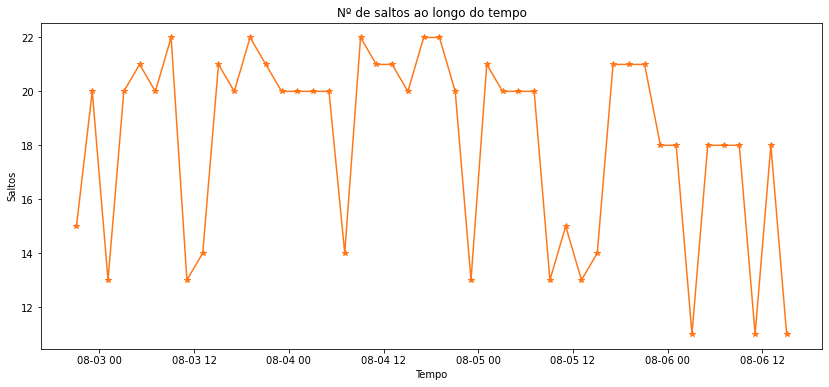

In [26]:
plot_uniqueHop(github, 6349)

## Correlação entre latência e nº saltos

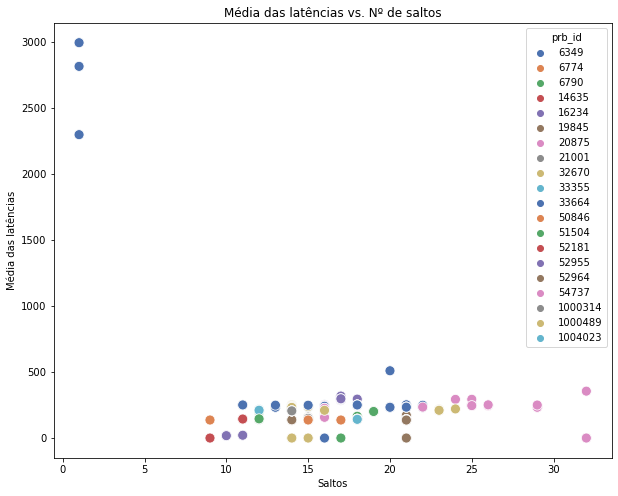

In [27]:
plotCorrelation(github)

## Latência ao longo do tempo (agregada)

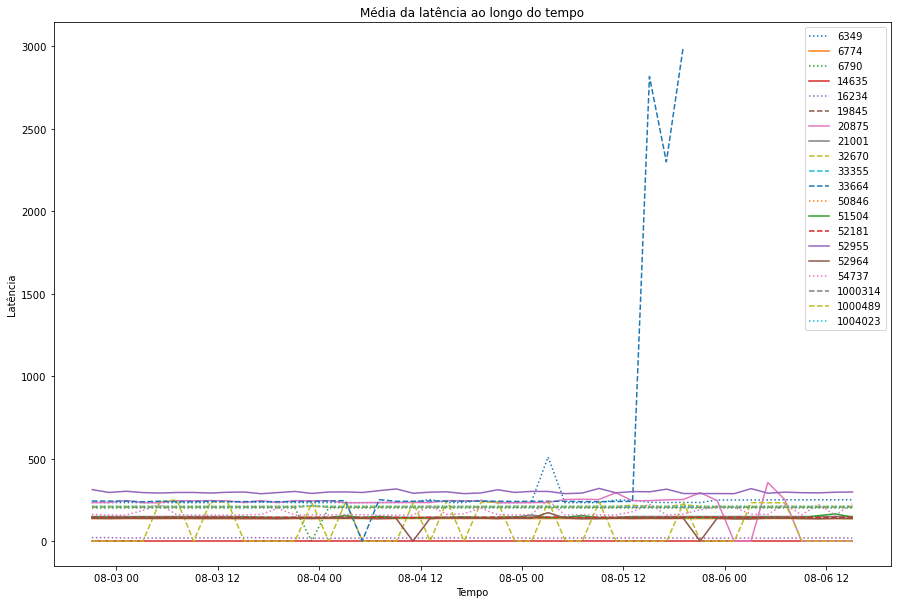

In [28]:
plot_aggregatesRtt(github)

## Saltos ao longo do tempo (agregados)

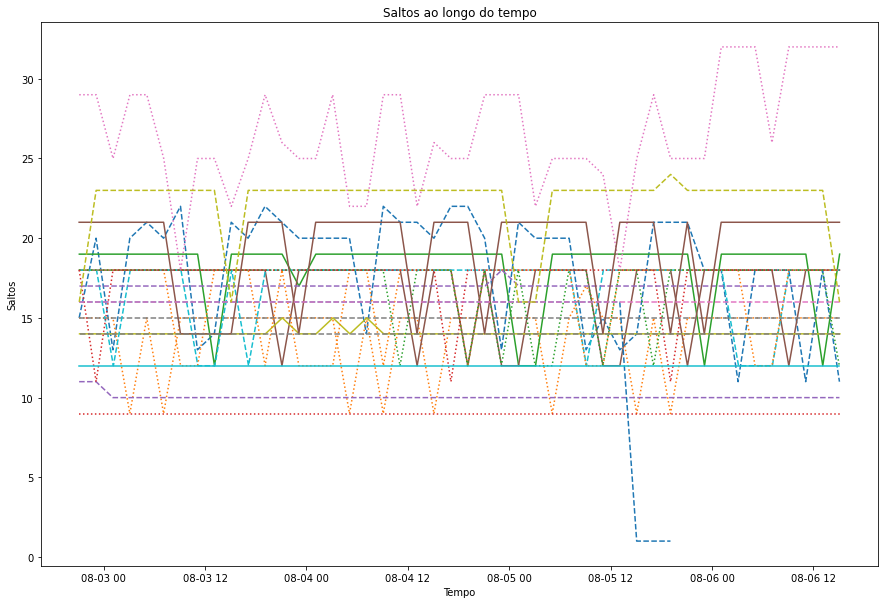

In [29]:
plot_aggregatesHops(github, legend=False)

<h1 align='center'> Zero Hora </h1>

In [30]:
zh = pd.read_json('data/zh.json')

In [31]:
zh = magic(zh)

In [32]:
zh.head()

fw  lts     endtime         dst_name         dst_addr  \
timestamp                                                                      
2022-08-02 21:05:01  4770   79  1659474349  194.126.175.195  194.126.175.195   
2022-08-02 21:05:13  5040  147  1659474372  194.126.175.195  194.126.175.195   
2022-08-02 21:05:04  5040  121  1659474348  194.126.175.195  194.126.175.195   
2022-08-02 21:05:21  5040  114  1659474361  194.126.175.195  194.126.175.195   
2022-08-02 21:06:10  5010   17  1659474433  194.126.175.195  194.126.175.195   

                          src_addr proto  af  size  paris_id  ...    msm_id  \
timestamp                                                     ...             
2022-08-02 21:05:01    192.168.0.3  ICMP   4    48         3  ...  43150090   
2022-08-02 21:05:13   200.132.1.32  ICMP   4    48         3  ...  43150090   
2022-08-02 21:05:04    23.170.33.3  ICMP   4    48         3  ...  43150090   
2022-08-02 21:05:21  45.11.105.136  ICMP   4    48         3  ...  43150090   
2022-08-02 21:06:10  187.0.196.133  ICMP   4    48         3  ...  43150090   

                      prb_id    msm_name             from        type  \
timestamp                                                               
2022-08-02 21:05:01    32670  Traceroute  181.220.141.172  traceroute   
2022-08-02 21:05:13     6349  Traceroute     200.132.1.32  traceroute   
2022-08-02 21:05:04     6774  Traceroute      23.170.33.3  traceroute   
2022-08-02 21:05:21     6790  Traceroute    45.11.105.136  traceroute   
2022-08-02 21:06:10  1000314  Traceroute    187.0.196.133  traceroute   

                     group_id  stored_timestamp   mver  hops    rtt_mean  
timestamp                                                                 
2022-08-02 21:05:01  43150090        1659512782    NaN  14.0  227.450667  
2022-08-02 21:05:13  43150090        1659512285  2.4.1  14.0  216.759667  
2022-08-02 21:05:04  43150090        1659513041  2.4.1  14.0  129.228000  
2022-08-02 21:05:21  43150090        1659513013  2.4.1  12.0  183.290333  
2022-08-02 21:06:10  43150090        1659510900  2.2.0  14.0  185.157333  

[5 rows x 21 columns]

In [33]:
zh.shape

(910, 21)

## Latência ao longo do tempo de forma individual

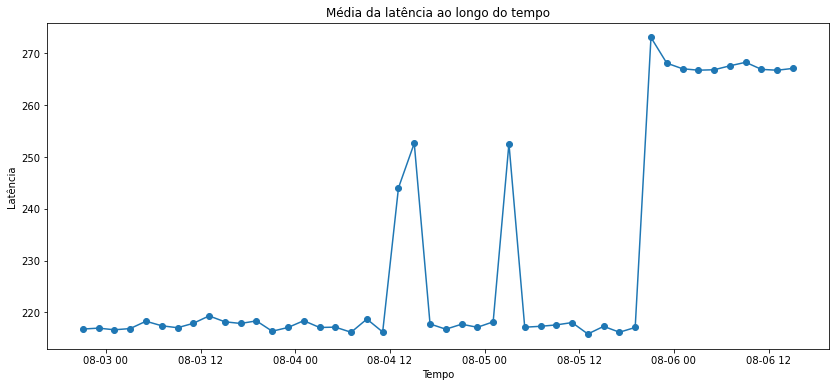

In [34]:
plot_uniqueRtt(zh, 6349)

## Nº de saltos ao longo do tempo de forma individual

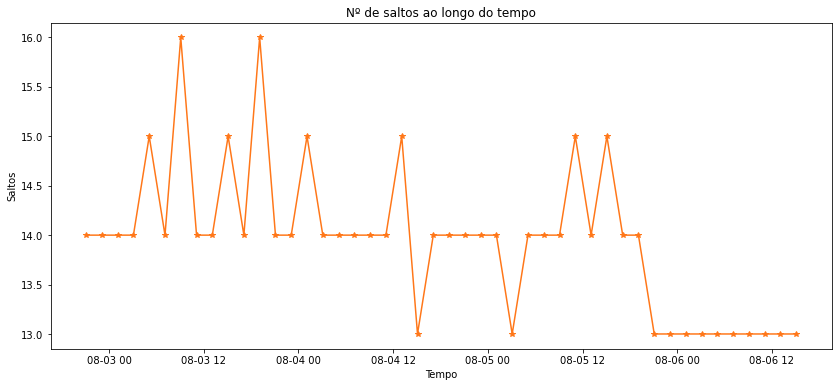

In [35]:
plot_uniqueHop(zh, 6349)

## Correlação entre nº de saltos e latência

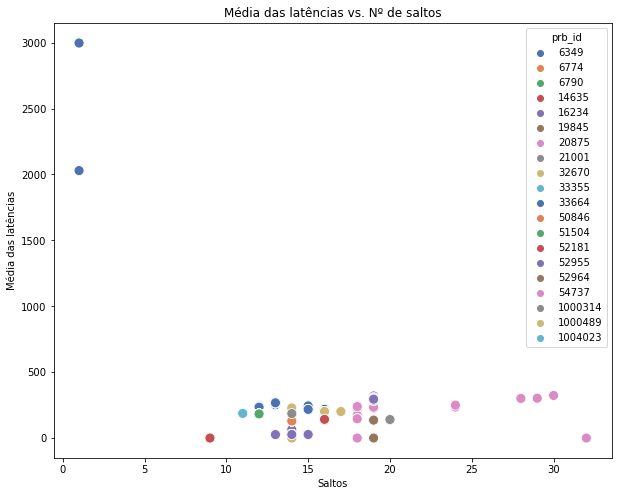

In [36]:
plotCorrelation(zh)

## Latência ao longo do tempo (agregada)

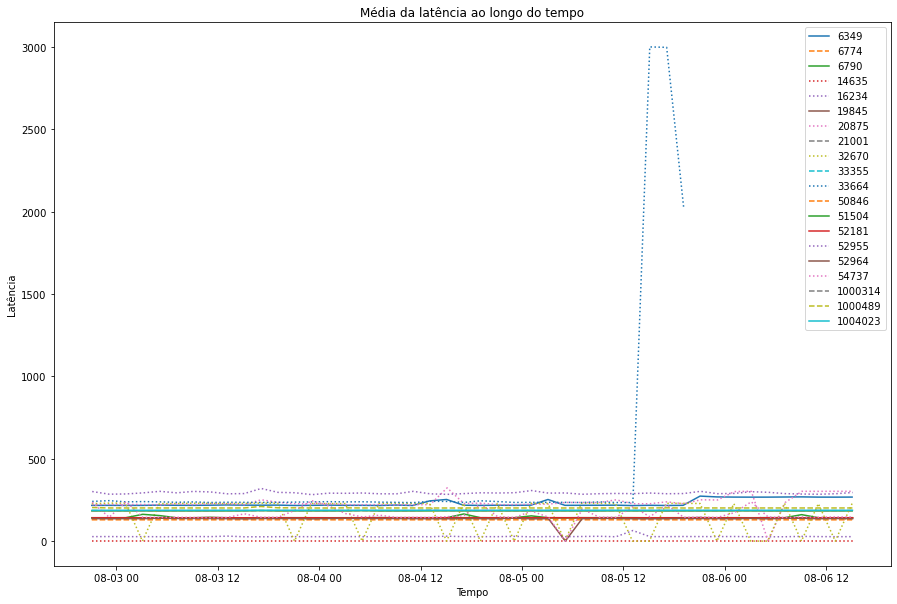

In [37]:
plot_aggregatesRtt(zh)

## Saltos ao longo do tempo (agregados)

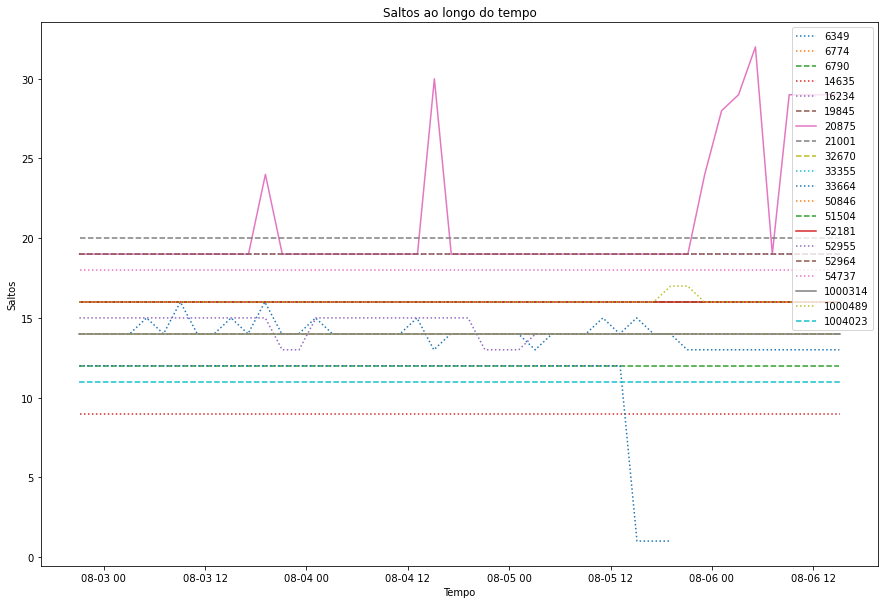

In [38]:
plot_aggregatesHops(zh)

# Plots sem erros e/ou outliers

Os gráficos sem o devido tratamento dos dados ficaram confusos ou difíceis de entender? Use a função cleanData.
É simples, basta passar o nome do dataset e os ID's das probes que deseja remover, feito isso é só plotar novamente os gráficos através das funcões.

In [39]:
help(cleanData)

Help on function cleanData in module __main__:

cleanData(data, *ids)
    Retorna os dados sem as probes que foram passadas como parametros
    
    :param data: dataset (recomendado json do proprio ATLAS Ripe)
    :param ids: id das probes que se deseja remover dos dados



## ZH com tratamento X sem tratamento

In [40]:
checksum(zh)

[14635]

In [41]:
cleanzh = cleanData(zh, 33664, 14635)

(None, None)

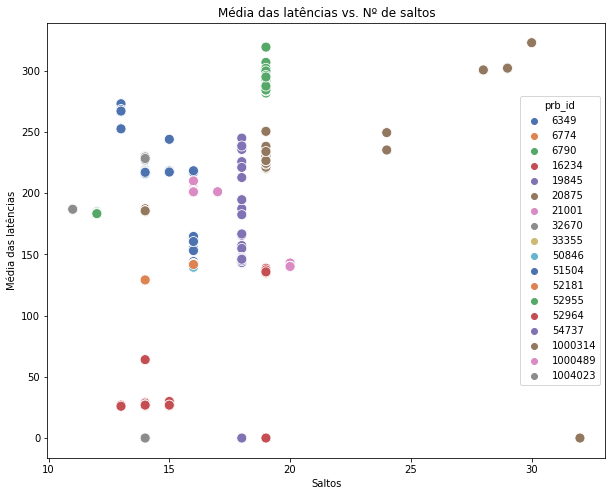

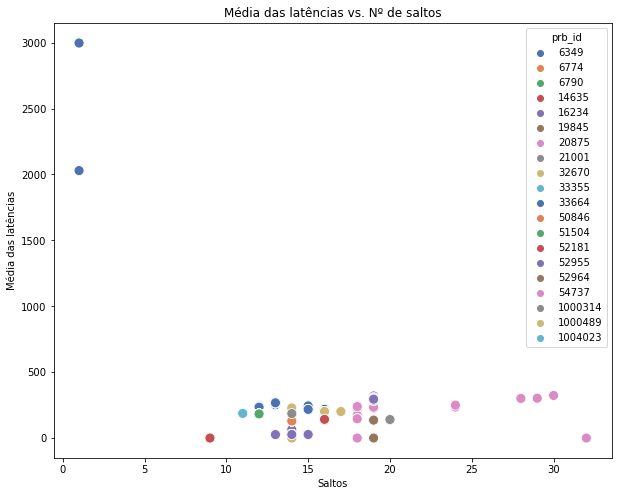

In [42]:
plotCorrelation(cleanzh), plotCorrelation(zh)

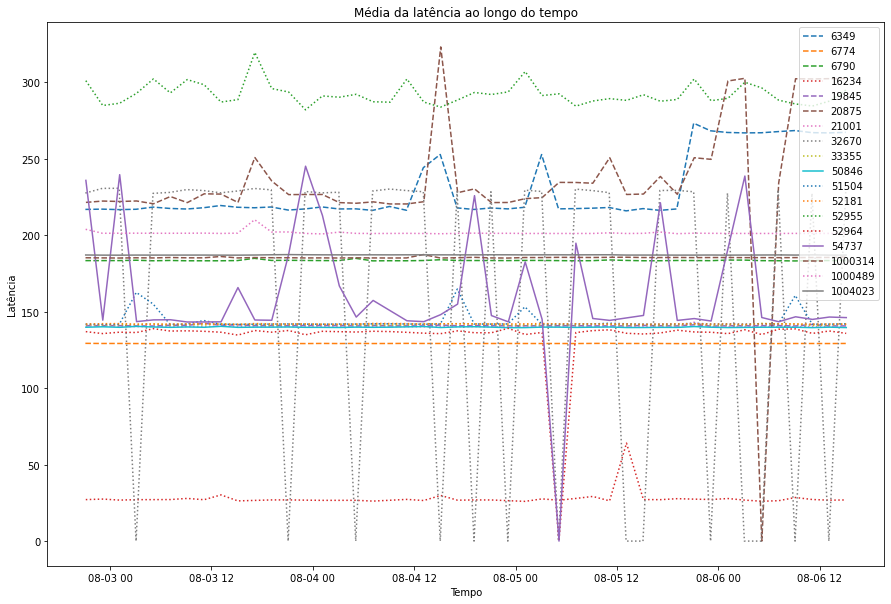

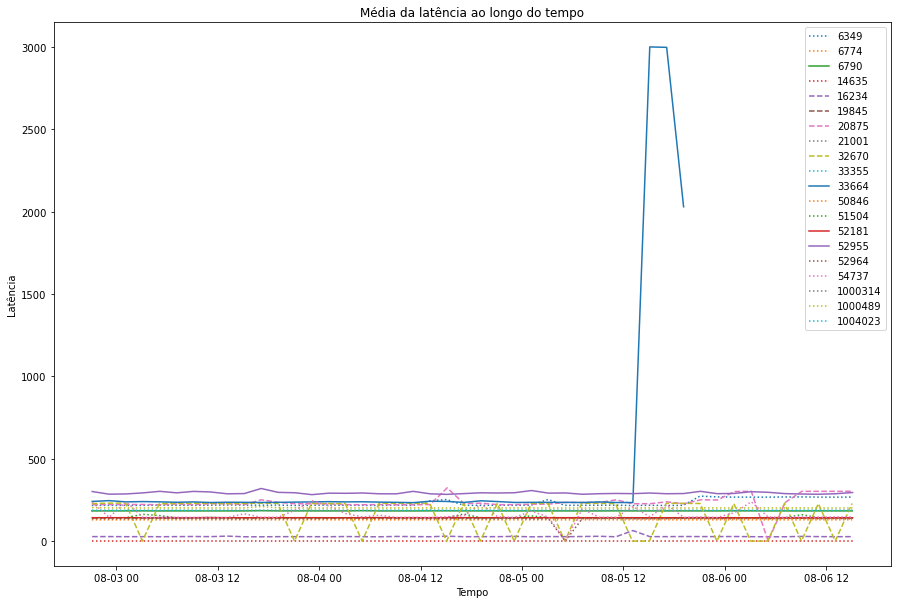

(None, None)

In [43]:
plot_aggregatesRtt(cleanzh), plot_aggregatesRtt(zh)

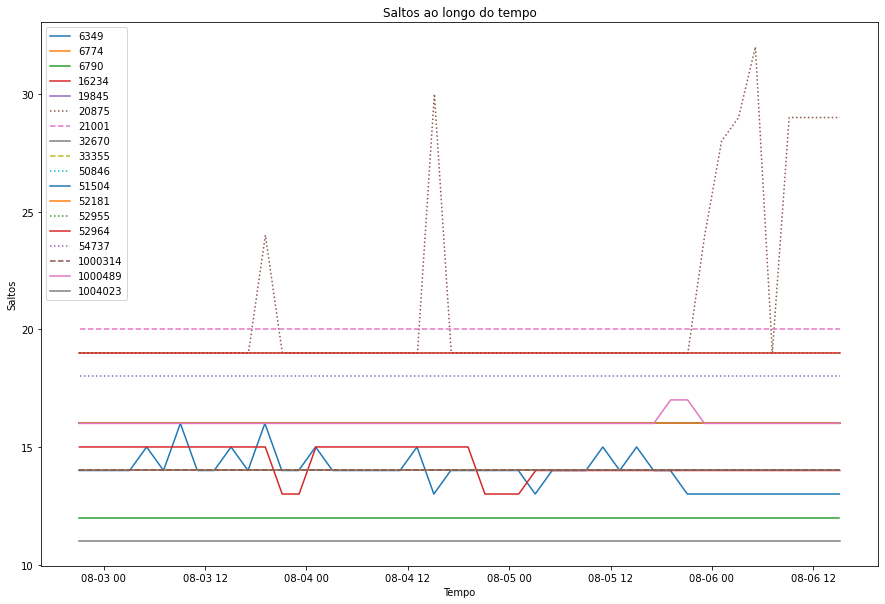

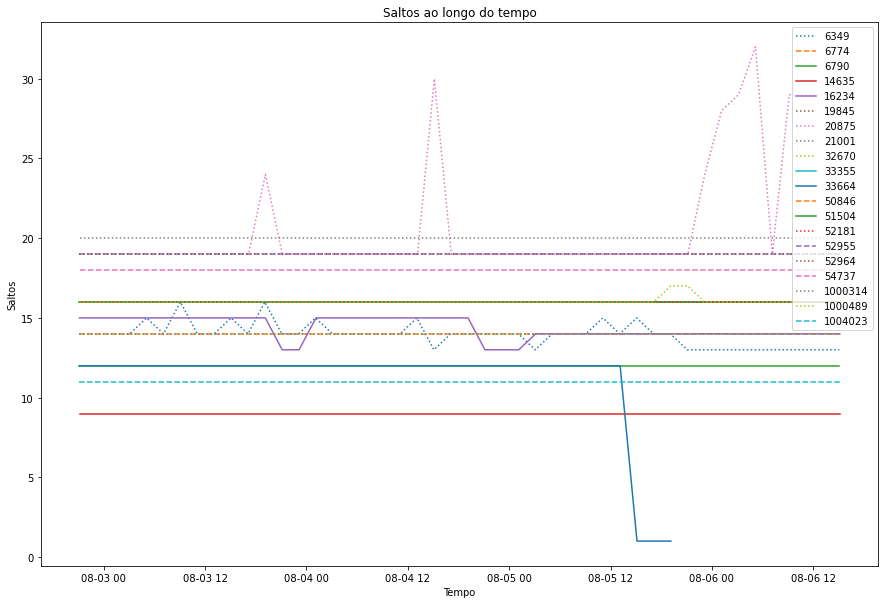

(None, None)

In [44]:
plot_aggregatesHops(cleanzh), plot_aggregatesHops(zh)

## Notion com tratamento X sem tratamento

In [45]:
checksum(notion)

[14635]

In [46]:
cleanotion = cleanData(notion, 14635, 33664)

(None, None)

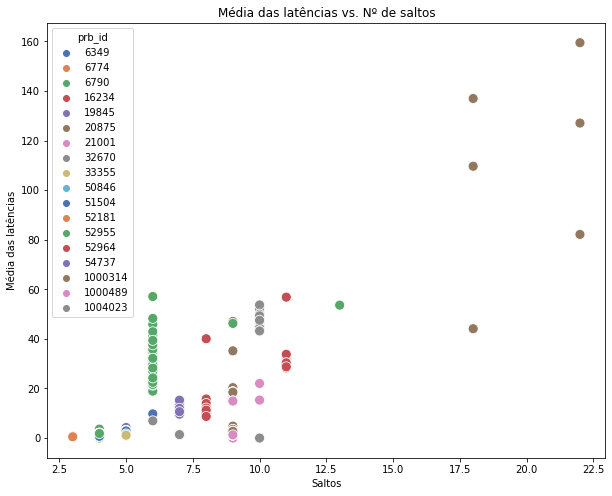

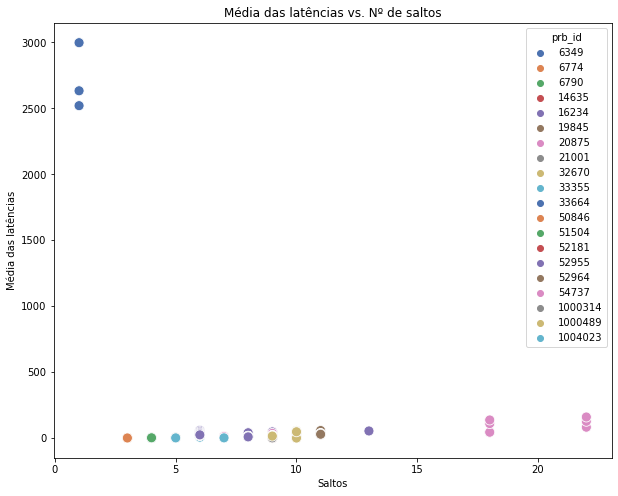

In [47]:
plotCorrelation(cleanotion), plotCorrelation(notion)

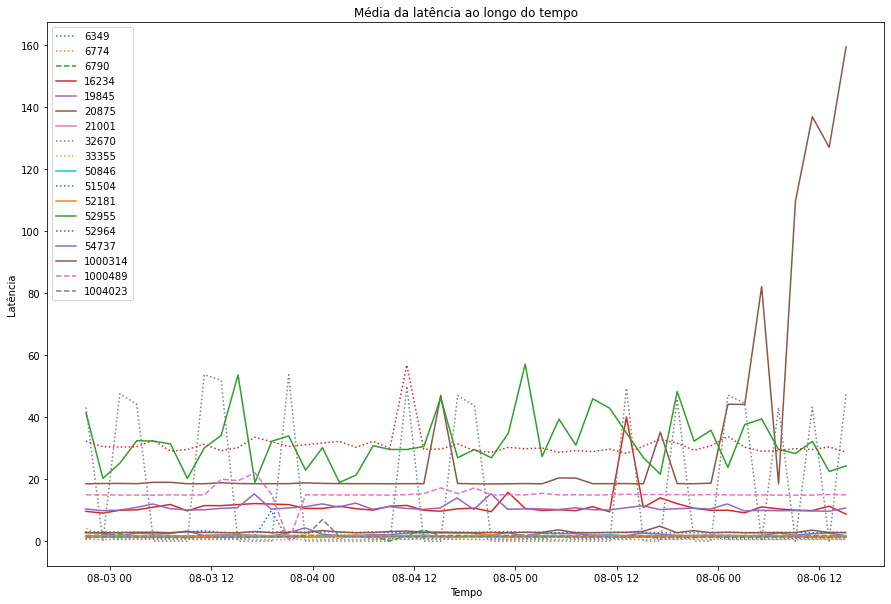

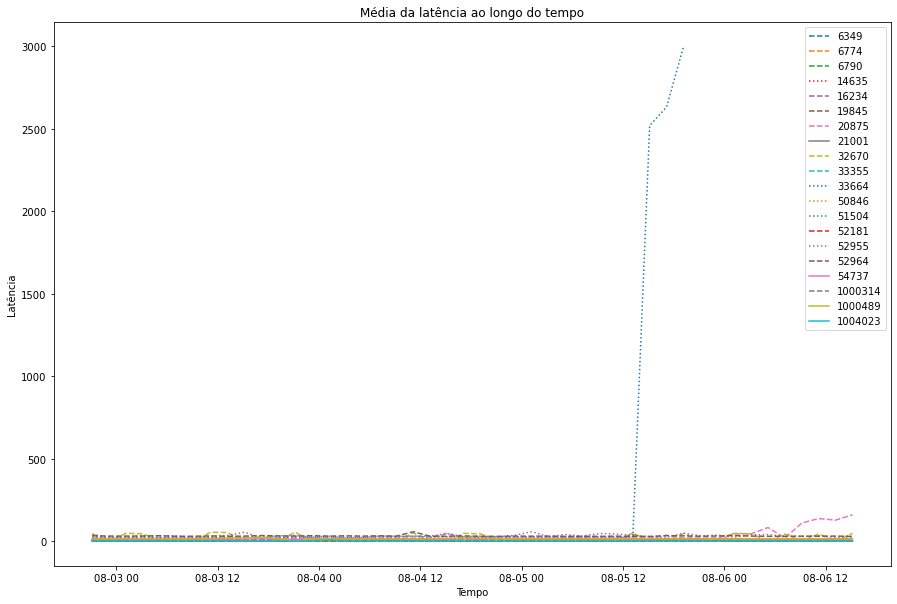

(None, None)

In [48]:
plot_aggregatesRtt(cleanotion), plot_aggregatesRtt(notion)

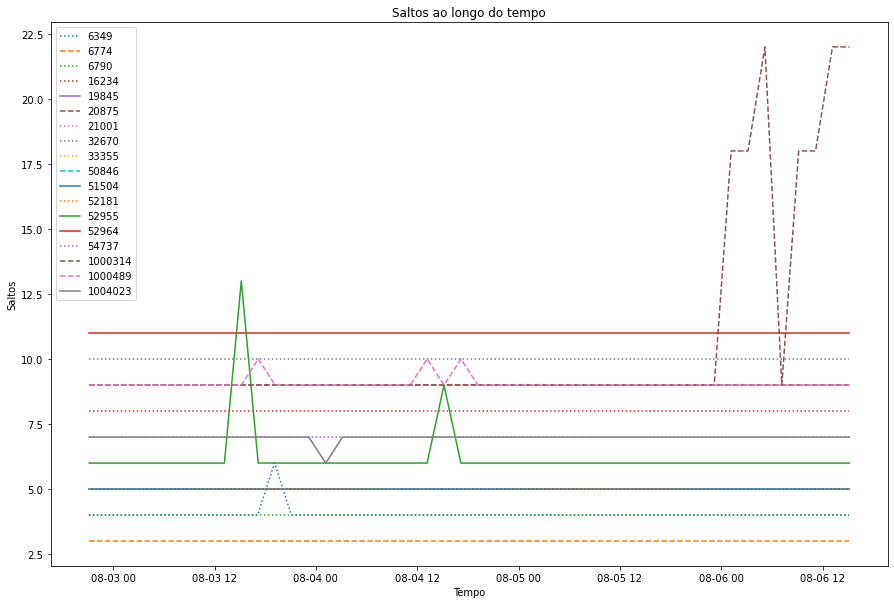

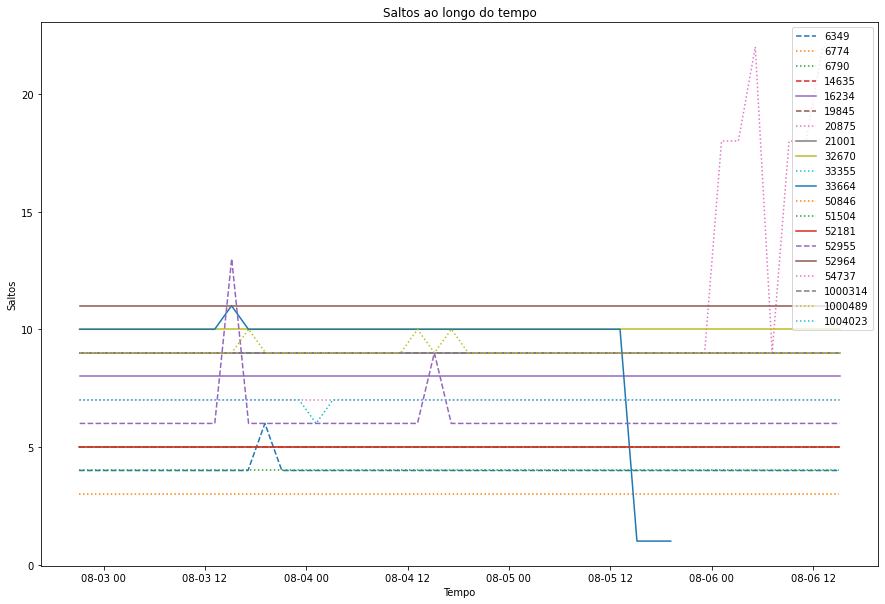

(None, None)

In [49]:
plot_aggregatesHops(cleanotion), plot_aggregatesHops(notion)

## GitHub com tratamento X sem tratamento

In [50]:
checksum(github)

[14635,
 6349,
 1000489,
 52181,
 33355,
 6774,
 20875,
 52964,
 50846,
 6790,
 19845,
 51504]

Probes que deram problema no último salto do GitHub: 20875, 14635

In [51]:
cleangit = cleanData(github, 14635, 33664)

(None, None)

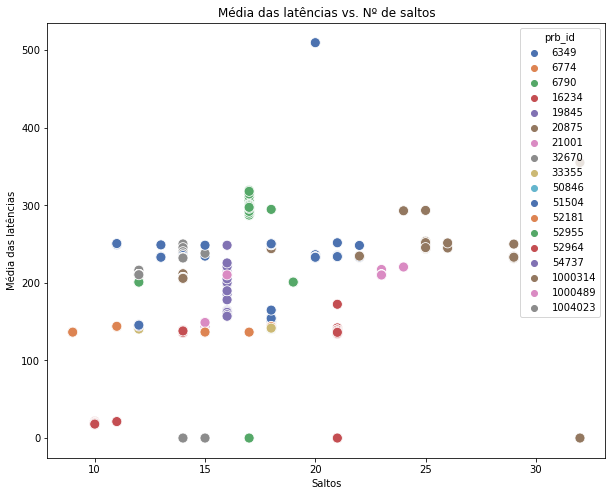

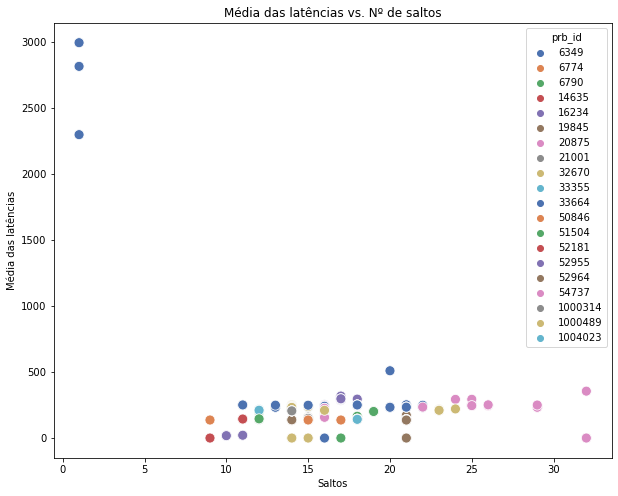

In [52]:
plotCorrelation(cleangit), plotCorrelation(github)

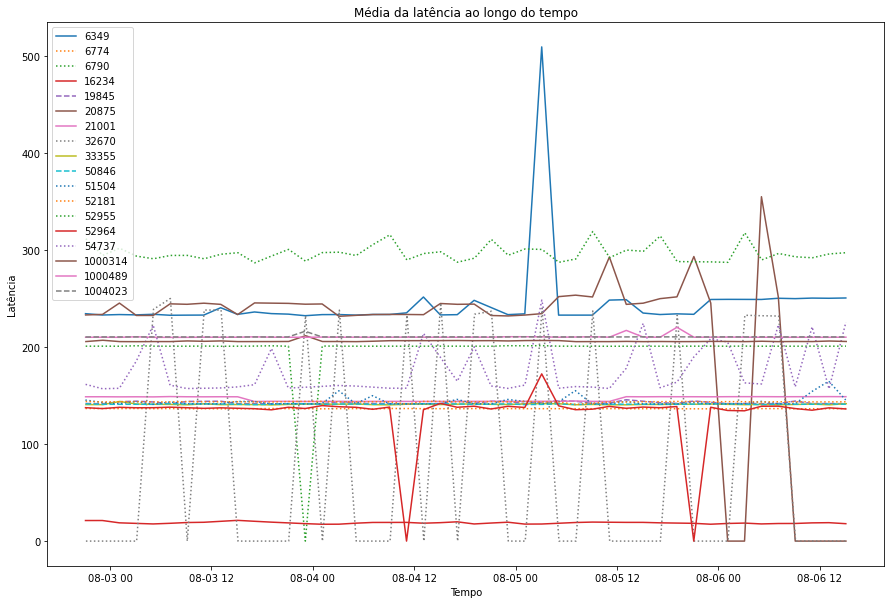

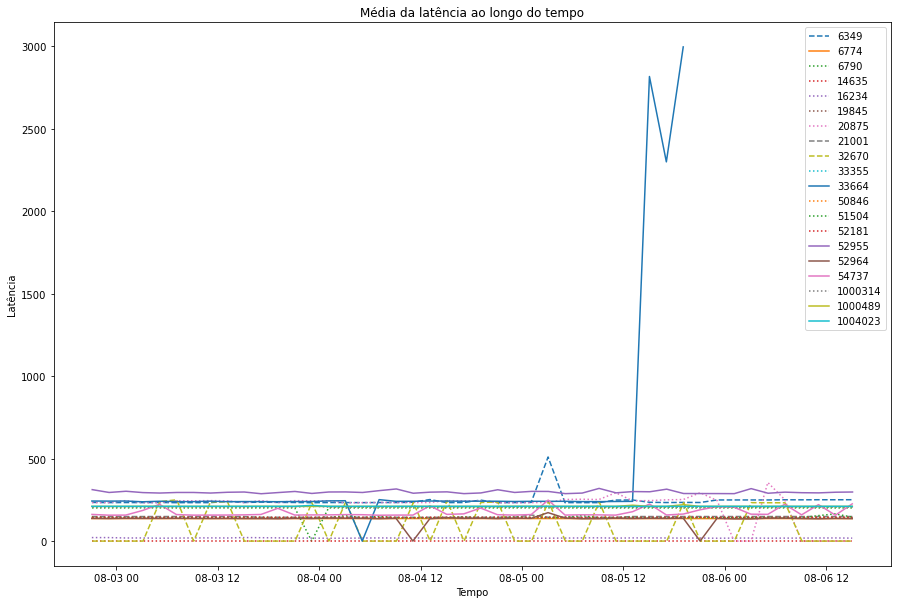

(None, None)

In [53]:
plot_aggregatesRtt(cleangit), plot_aggregatesRtt(github)

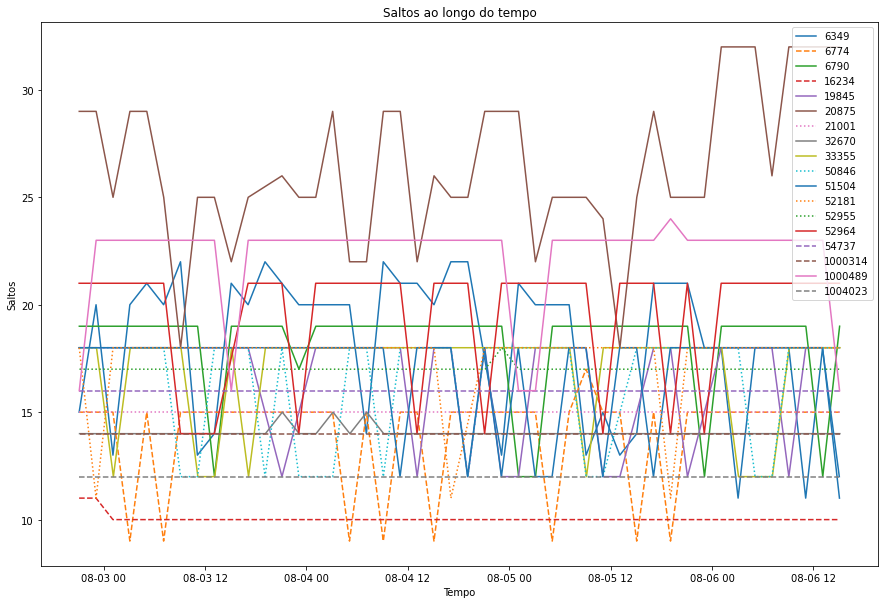

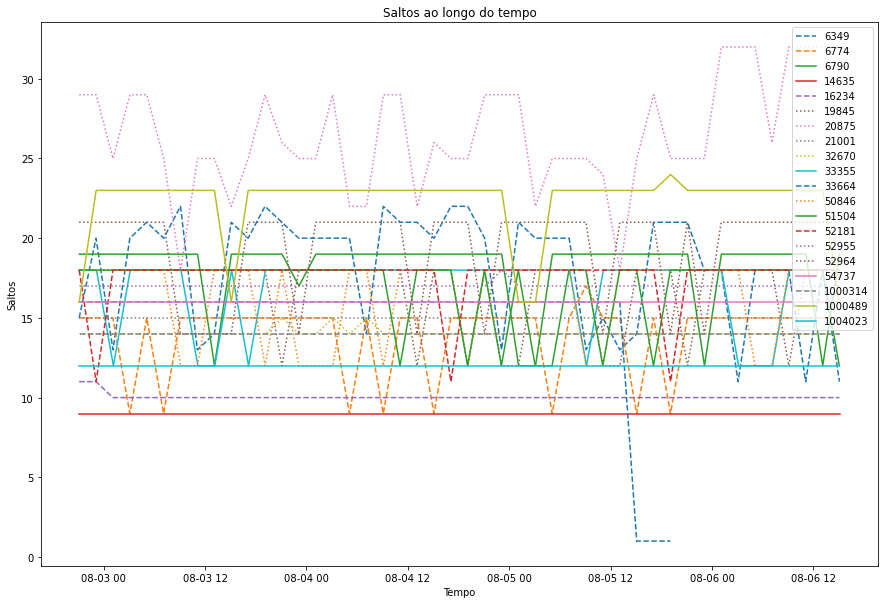

(None, None)

In [54]:
plot_aggregatesHops(cleangit), plot_aggregatesHops(github)

# Plot de latência ao longo do tempo separado por país

## Probes no Brasil
**Além das probes canadenses, também foi retirada a probe 33664, que é um outlier e para de responder, porém é uma probe do Brasil. Também foi removida a probe 52955, que é da Nova Zelândia.**

In [69]:
# NOTION
notion_brasil = cleanData(notion, 51504, 6774, 19845, 21001, 50846, 52181, 54737, 33355, 52964, 33664, 52955)

# GITHUB
github_brasil = cleanData(github, 51504, 6774, 19845, 21001, 50846, 52181, 54737, 33355, 52964, 33664, 52955)

# ZERO HORA
zh_brasil = cleanData(zh, 51504, 6774, 19845, 21001, 50846, 52181, 54737, 33355, 52964, 33664, 52955)

## Plot do Notion

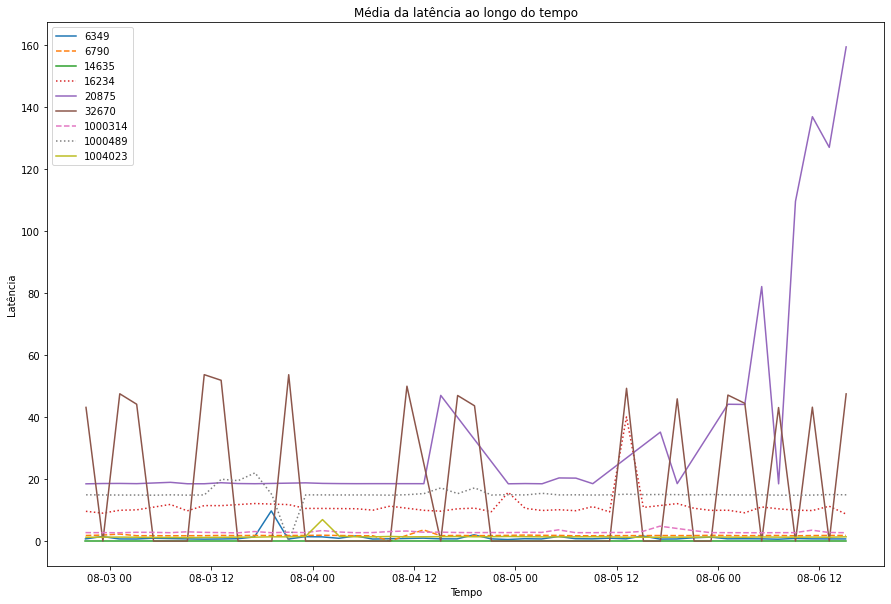

In [70]:
plot_aggregatesRtt(notion_brasil)

## Plot do Github

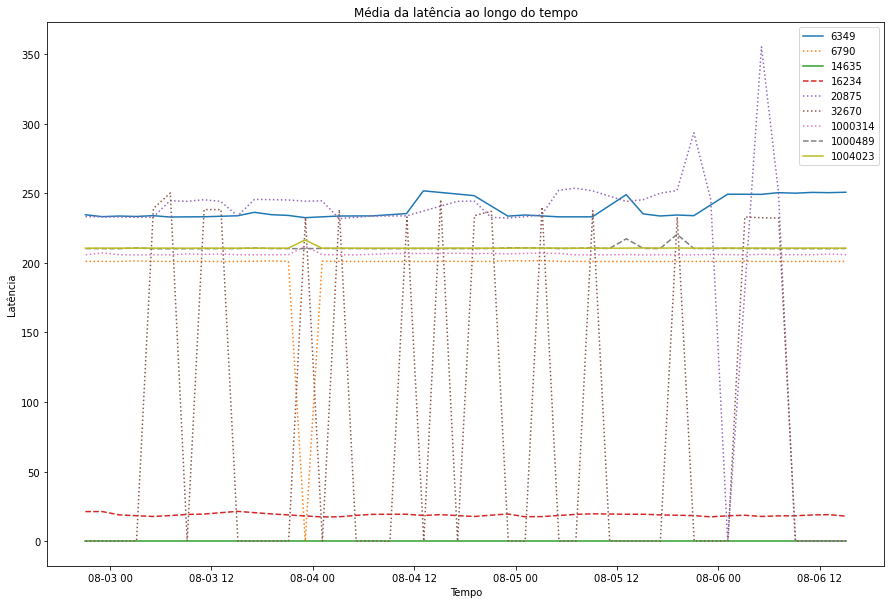

In [71]:
plot_aggregatesRtt(github_brasil)

## Plot do Zero Hora

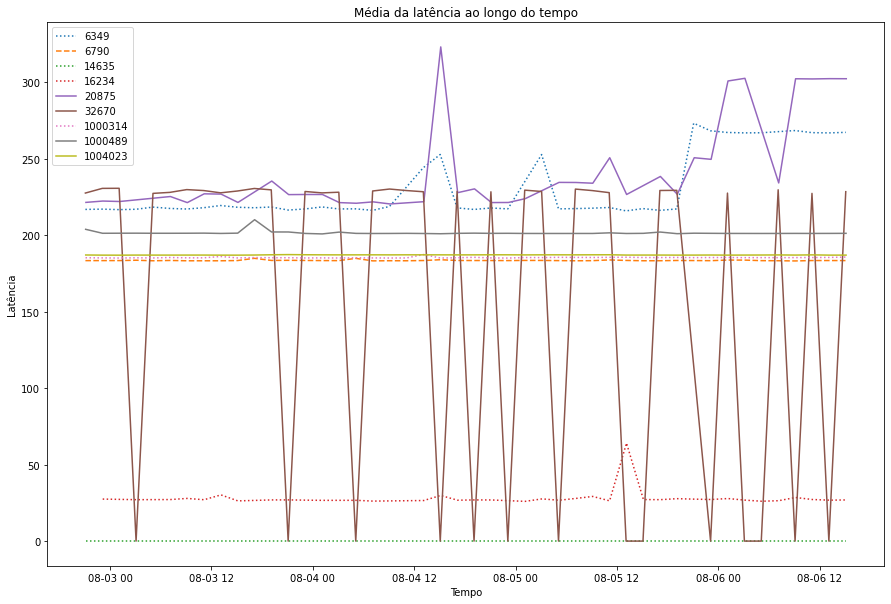

In [72]:
plot_aggregatesRtt(zh_brasil)

# Probes no Canadá

In [73]:
# NOTION
notion_canada = cleanData(notion, 6790, 1000314, 1000489, 1004023, 20875, 6349, 16234, 14635, 33664, 32670, 52955)

# GITHUB
github_canada = cleanData(github, 6790, 1000314, 1000489, 1004023, 20875, 6349, 16234, 14635, 33664, 32670, 52955)

# ZERO HORA
zh_canada = cleanData(zh, 6790, 1000314, 1000489, 1004023, 20875, 6349, 16234, 14635, 33664, 32670, 52955)

## Plot do Notion

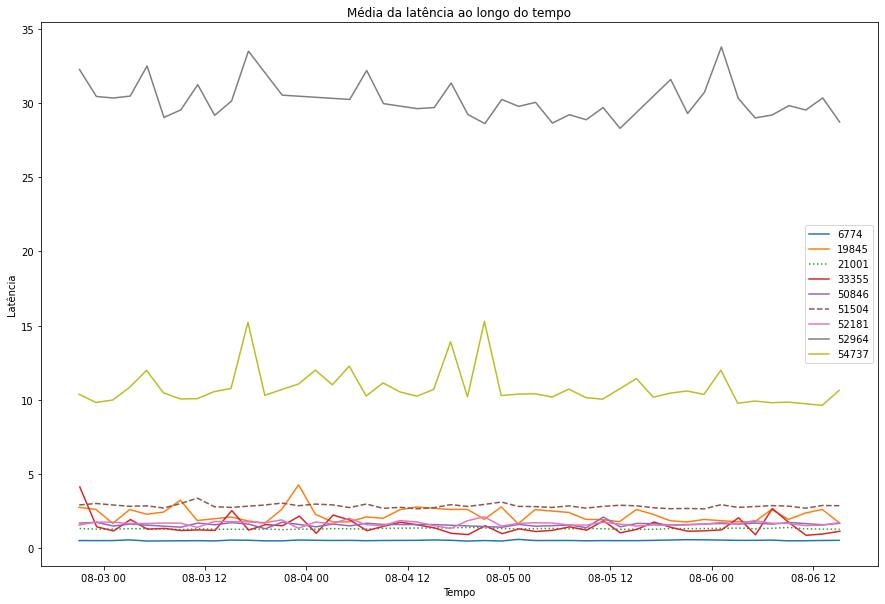

In [74]:
plot_aggregatesRtt(notion_canada)

## Plot do Github

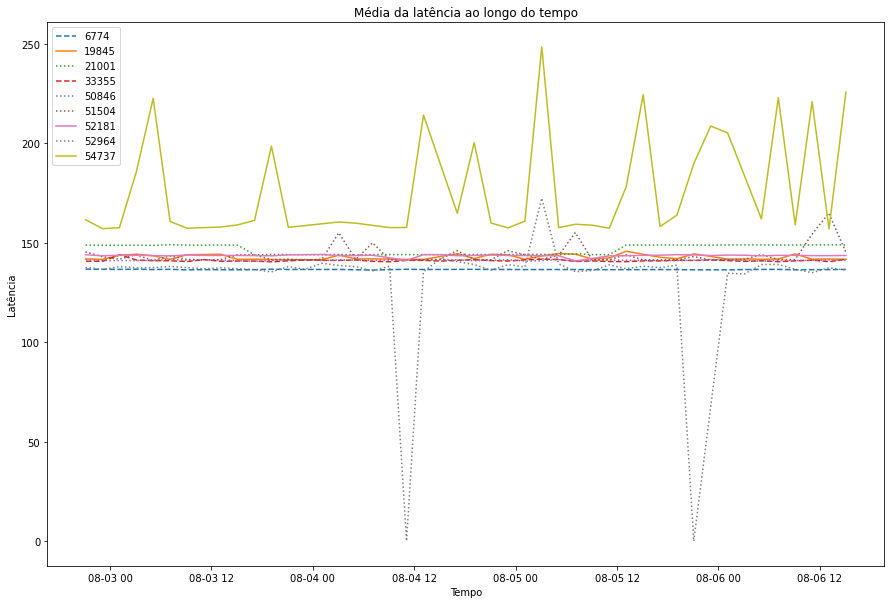

In [75]:
plot_aggregatesRtt(github_canada)

## Plot do Zero Hora

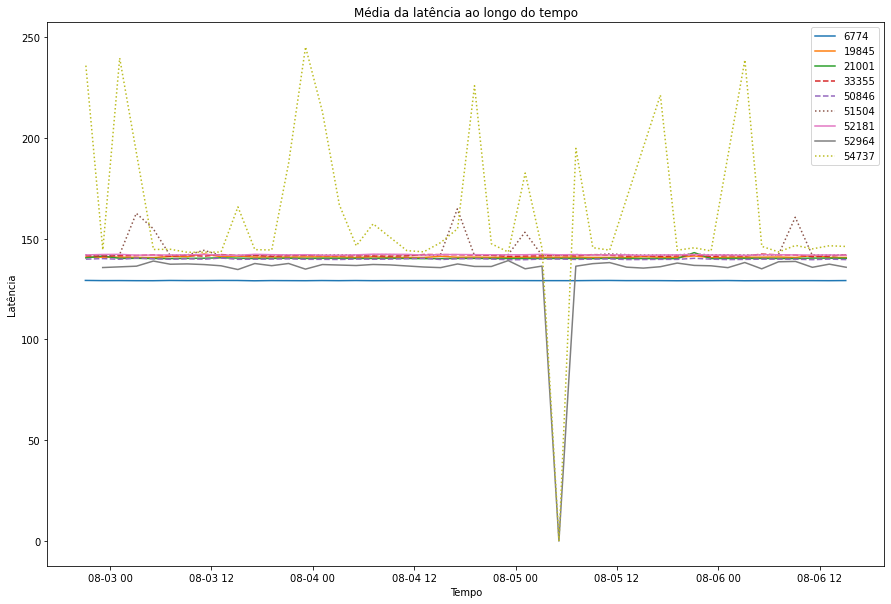

In [76]:
plot_aggregatesRtt(zh_canada)

# Plot de saltos separados por país

# Probes no Brasil
**Além das probes canadenses, também foi retirada a probe 33664, que é um outlier e para de reponder, porém é uma probe do Brasil.**

## Notion

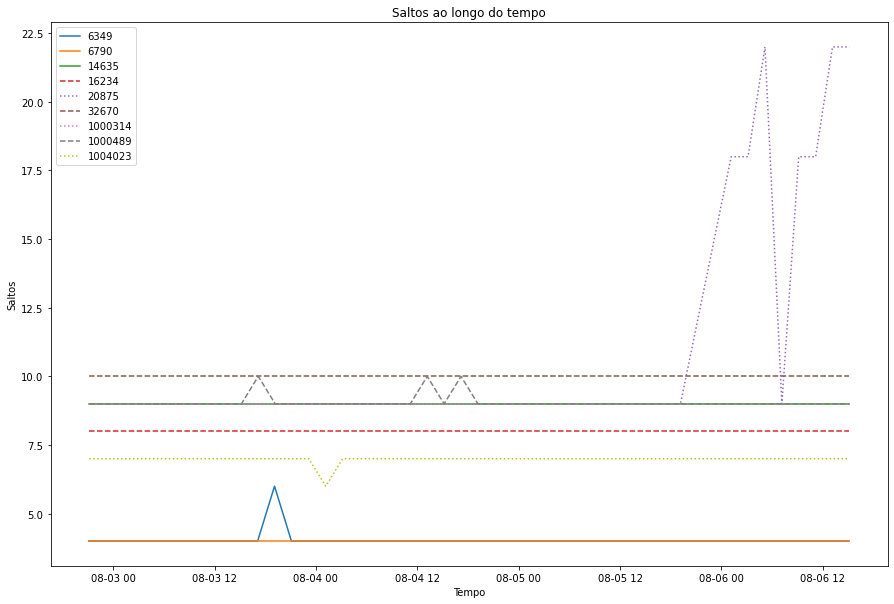

In [77]:
plot_aggregatesHops(notion_brasil)

## Github

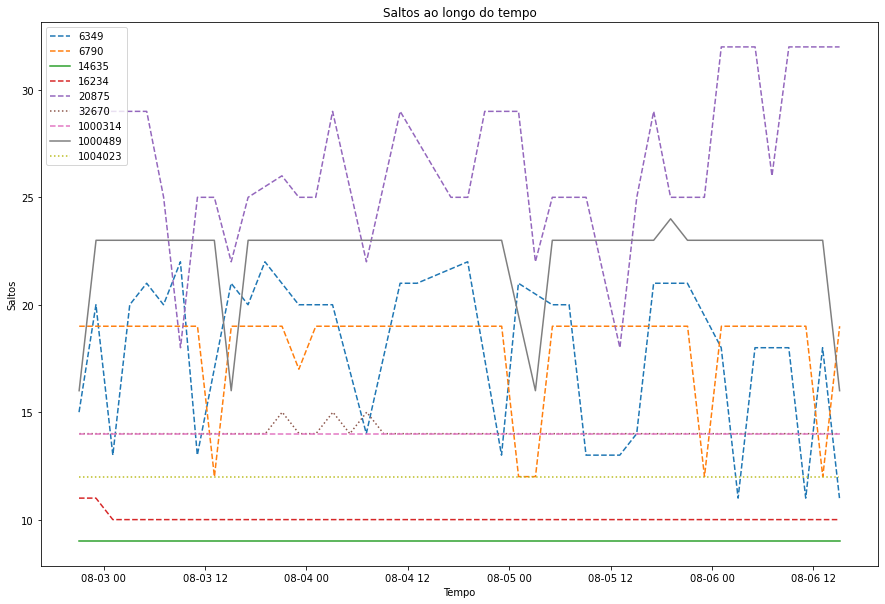

In [78]:
plot_aggregatesHops(github_brasil)

## Zero Hora

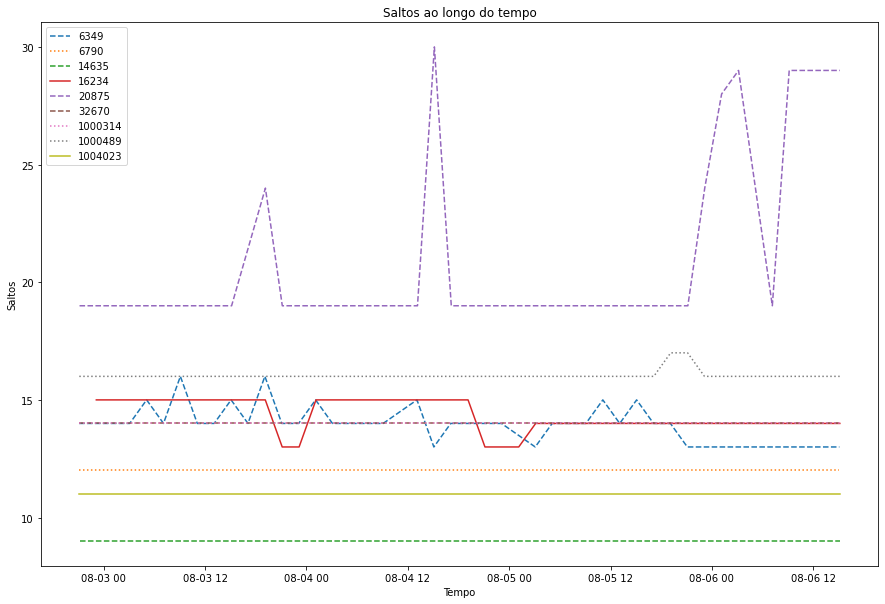

In [79]:
plot_aggregatesHops(zh_brasil)

# Probes no Canadá

## Notion

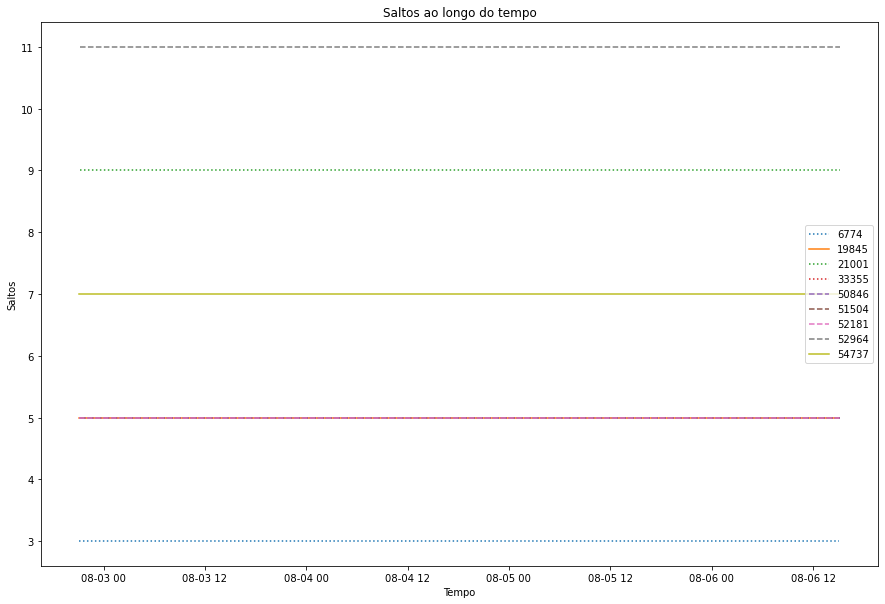

In [80]:
plot_aggregatesHops(notion_canada)

## Github

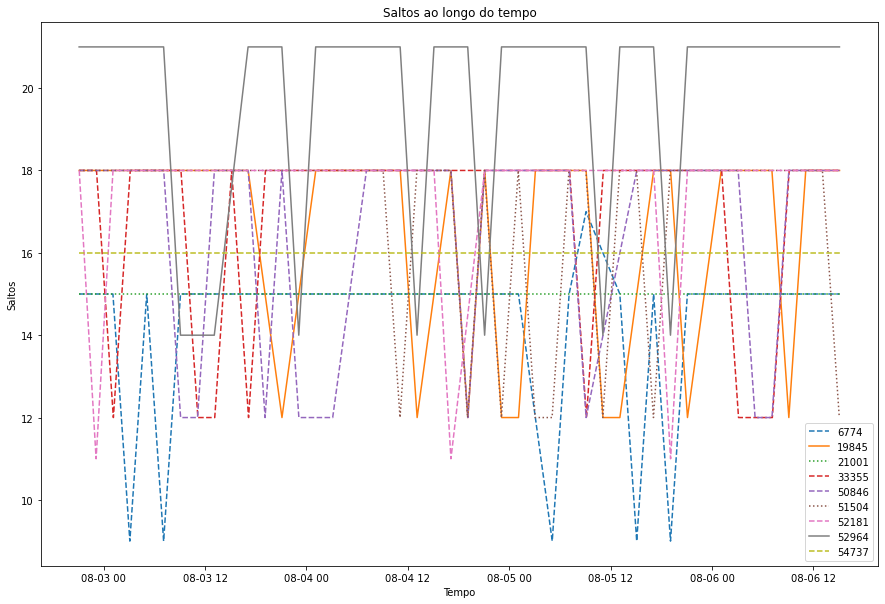

In [81]:
plot_aggregatesHops(github_canada)

## Zero Hora

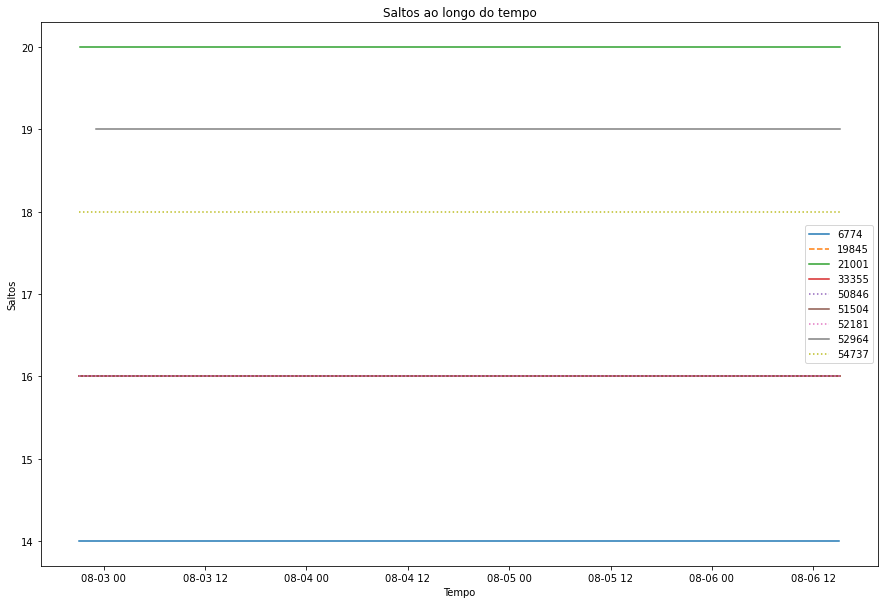

In [82]:
plot_aggregatesHops(zh_canada)